In [ ]:
%pylab inline
from random import randrange
from random import random
import statistics

Populating the interactive namespace from numpy and matplotlib


In [ ]:
L=40
p=[exp(-1.),exp(-2.),exp(-3.),exp(-4.)]
spins=ones((L,L),dtype=np.int32)


In [ ]:
p

[0.36787944117144233,
 0.1353352832366127,
 0.049787068367863944,
 0.01831563888873418]

In [ ]:
m=[]
for n in range(2**15):
  for i in range(L*L):
    x=randrange(0, L)
    y=randrange(0, L)
    if(x!=0 and x!=L-1 and y!=0 and y!=L-1):
      dE=spins[x,y]*(spins[x-1,y]+spins[x+1,y]+spins[x,y-1]+spins[x,y+1])
    elif(x==0 and y!=0 and y!=L-1):
      dE=spins[x,y]*(spins[L-1,y]+spins[x+1,y]+spins[x,y-1]+spins[x,y+1])
    elif(x==L-1 and y!=0 and y!=L-1):
      dE=spins[x,y]*(spins[x-1,y]+spins[0,y]+spins[x,y-1]+spins[x,y+1]) 
    elif(y==0 and x!=0 and x!=L-1):
      dE=spins[x,y]*(spins[x-1,y]+spins[x+1,y]+spins[x,L-1]+spins[x,y+1]) 
    elif(y==L-1 and x!=0 and x!=L-1):
      dE=spins[x,y]*(spins[x-1,y]+spins[x+1,y]+spins[x,y-1]+spins[x,0])
    elif(x==0 and y==0):
      dE=spins[x,y]*(spins[L-1,y]+spins[x+1,y]+spins[x,L-1]+spins[x,y+1])
    elif(x==0 and y==L-1):
      dE=spins[x,y]*(spins[L-1,y]+spins[x+1,y]+spins[x,y-1]+spins[x,0])
    elif(x==L-1 and y==0):
      dE=spins[x,y]*(spins[x-1,y]+spins[0,y]+spins[x,L-1]+spins[x,y+1])
    elif(x==L-1 and y==L-1):
      dE=spins[x,y]*(spins[x-1,y]+spins[0,y]+spins[x,y-1]+spins[x,0])

    if(dE<=0):
      spins[x,y]=-1*spins[x,y]
    else:
      if(random()<p[dE-1]):
        spins[x,y]=-1*spins[x,y]

  m.append(sum(spins)/(L*L))

(array([0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 7 Text major ticklabel objects>)

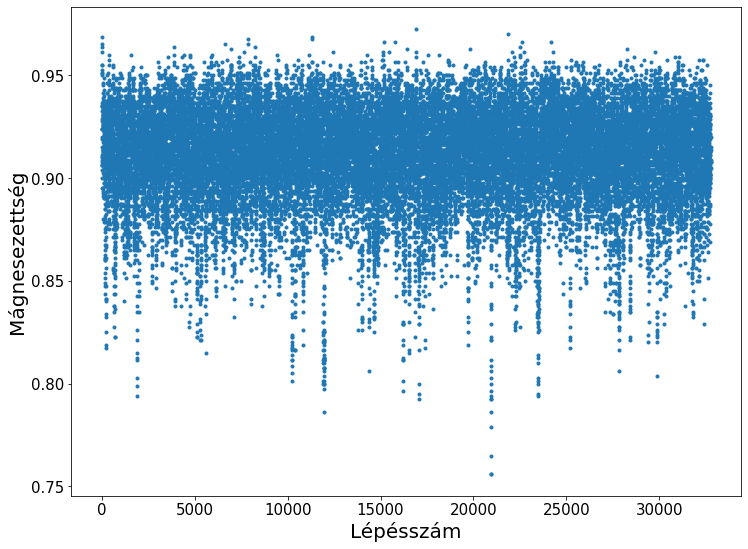

In [ ]:
figure(figsize=(12, 9))
plot(m,'o',markersize=3)
xlabel('Lépésszám',fontsize=20)
ylabel('Mágnesezettség',fontsize=20)
xticks(fontsize = 15)
yticks(fontsize = 15)

(array([0.86, 0.88, 0.9 , 0.92, 0.94, 0.96, 0.98]),
 <a list of 7 Text major ticklabel objects>)

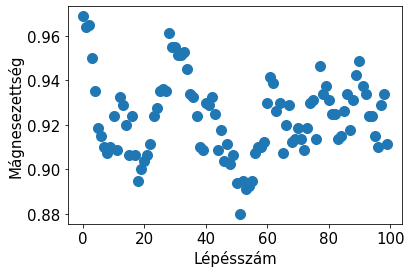

In [ ]:

plot(m[:100],'o',markersize=10)
xlabel('Lépésszám',fontsize=15)
ylabel('Mágnesezettség',fontsize=15)
xticks(fontsize = 15)
yticks(fontsize = 15)

In [ ]:
m[0:20]

[0.9725,
 0.96125,
 0.95625,
 0.94125,
 0.92625,
 0.925,
 0.925,
 0.89625,
 0.8925,
 0.87625,
 0.9075,
 0.90125,
 0.88625,
 0.90125,
 0.91125,
 0.92125,
 0.92,
 0.93875,
 0.925,
 0.925]

In [ ]:
average(m)

0.9111896133422852

In [ ]:
dm=[]
for i in range(100):
  mi=[]
  for j in range(int(len(m)/(2**i))):
    mi.append(average(m[(2**i)*j:(2**i)*j+(2**i)]))
  dm.append(sqrt(statistics.variance(mi)/(len(mi)-1)))
  if(len(mi)<20):
    break


(array([0.0001 , 0.00015, 0.0002 , 0.00025, 0.0003 , 0.00035, 0.0004 ,
        0.00045, 0.0005 ]), <a list of 9 Text major ticklabel objects>)

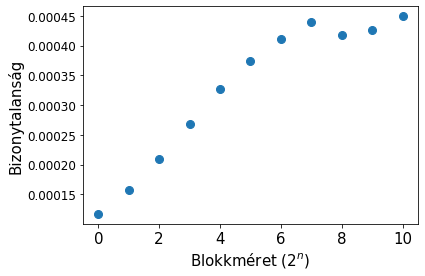

In [ ]:
plot(dm[:-1],'o',markersize=8)
xlabel('Blokkméret ($2^n$)',fontsize=15)
ylabel('Bizonytalanság',fontsize=15)
xticks(fontsize = 15)
yticks(fontsize = 12)

In [ ]:
dm

[0.00011724836797092256,
 0.00015812127760825198,
 0.00020968867303777113,
 0.0002690647831846843,
 0.0003272423871301678,
 0.0003734709568366684,
 0.00041062466218467326,
 0.0004403967105031007,
 0.0004185174090374407,
 0.00042576167775240127,
 0.00044929603398901507,
 0.000523004468193184]

In [ ]:
dms=[]
for it in range(8):
  dm=[]
  for i in range(100):
    mi=[]
    for j in range(int(len(m[:(it+1)*(2**12)])/(2**i))):
      mi.append(average(m[(2**i)*j:(2**i)*j+(2**i)]))
    dm.append(sqrt(statistics.variance(mi)/(len(mi)-1)))
    if(len(mi)<20):
      break
  dms.append(dm)

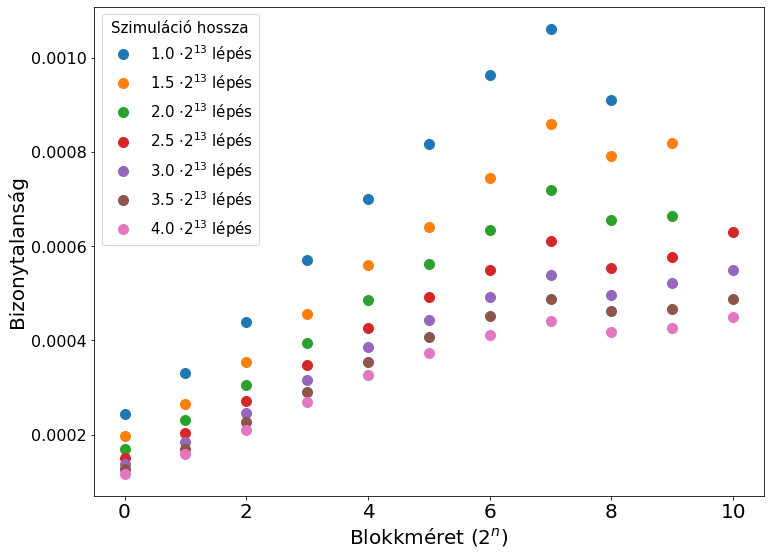

In [ ]:
figure(figsize=(12, 9))
for i in range(7):
  plot(dms[i+1][:-1],'o',markersize=10,label=str(i*0.5+1)+' $\cdot 2^{13}$ lépés')
xlabel('Blokkméret ($2^n$)',fontsize=20)
ylabel('Bizonytalanság',fontsize=20)
xticks(fontsize = 20)
yticks(fontsize = 16) 
legend(title='Szimuláció hossza',fontsize=15,title_fontsize=15) 


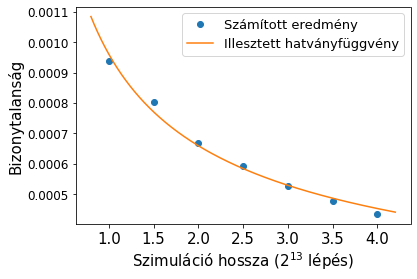

In [ ]:
hiba=[]
for i in range(7):
  hiba.append(average(dms[i+1][-5:-1]))
plot([1,1.5,2,2.5,3,3.5,4],hiba,'o',label='Számított eredmény')
plot(linspace(0.8,4.2,1000),hatvany(linspace(0.8,4.2,1000),*popt),label='Illesztett hatványfüggvény')
xlabel('Szimuláció hossza ($2^{13}$ lépés)',fontsize=15)
ylabel('Bizonytalanság',fontsize=15)
xticks(fontsize = 15)
yticks(fontsize = 12) 
legend(fontsize=13)

In [ ]:
def hatvany(x,a,n):
  return a*x**n
from scipy.optimize import curve_fit
#popt, pcov = curve_fit(hatvany, [1*2**13,1.5*2**13,2*2**13,2.5*2**13,3*2**13,3.5*2**13,4*2**13], hiba)
popt, pcov = curve_fit(hatvany, [1,1.5,2,2.5,3,3.5,4], hiba)

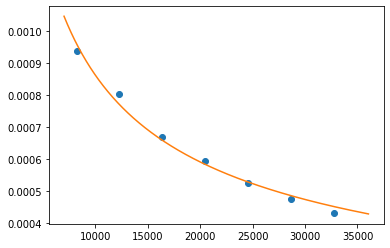

In [ ]:

plot([1*2**13,1.5*2**13,2*2**13,2.5*2**13,3*2**13,3.5*2**13,4*2**13],hiba,'o')
plot(linspace(7000,1.1*2**15,1000),hatvany(linspace(7000,1.1*2**15,1000),*popt))

In [ ]:
popt

array([ 0.00096067, -0.54358305])